<a href="https://colab.research.google.com/github/MANOJ-S-NEGI/TENSORFLOW/blob/main/tensorflow_let's_start_tensorflow_'Fashion_Mnist'.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise:
###section 1 

```
Try this network out for yourself on the TensorFlow Playground website.
Hint: there are 5 hidden layers but the output layer isn't pictured, you'll have to decide what the output layer should be based on the input data.

1.Create a classification dataset using Scikit-Learn's make_moons() function,  visualize it and then build a model to fit it at over 85% accuracy.

2.Train a model to get 88%+ accuracy on the fashion MNIST test set. Plot a confusion matrix to see the results after.

3.Recreate TensorFlow's softmax activation function in your own code. Make sure it can accept a tensor and return that tensor after having the softmax function applied to it.
```
### Section 2


```
Create a function (or write code) to visualize multiple image predictions for the fashion MNIST at the same time. Plot at least three different images and their prediciton labels at the same time. 

Hint: see the classifcation tutorial in the TensorFlow documentation for ideas.
Make a function to show an image of a certain class of the fashion MNIST dataset and make a prediction on it. For example, plot 3 images of the T-shirt class with their predictions.

📖 02. Neural network classification with TensorFlow Extra-curriculum
Watch 3Blue1Brown's neural networks video 2: Gradient descent, how neural networks learn. After you're done, write 100 words about what you've learned.
If you haven't already, watch video 1: But what is a Neural Network?. Note the activation function they talk about at the end.
Watch MIT's introduction to deep learning lecture 1 (if you haven't already) to get an idea of the concepts behind using linear and non-linear functions.
Spend 1-hour reading Michael Nielsen's Neural Networks and Deep Learning book.
Read the ML-Glossary documentation on activation functions. Which one is your favourite?

After you've read the ML-Glossary, see which activation functions are available in TensorFlow by searching "tensorflow activation functions".

```



# Fashion Mnist Dataset:
```
The classes are:
Label	Description
0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot
```
# objective is to predict the image with correct label.


In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix


In [ ]:
# importing data:
from tensorflow.keras.datasets import fashion_mnist
# As data is already split into train and test: 
(train_data,train_label), (test_data, test_label) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


## Know about data.

In [ ]:
## checking the dataset shape.
train_data.shape, train_label.shape, test_data.shape, test_label.shape,


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

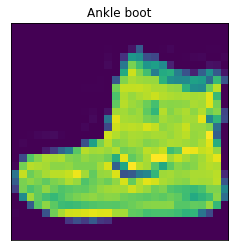

In [ ]:
# checking the image and label:
plt.imshow(train_data[0])
plt.title(train_label[0]);
plt.xticks([])
plt.yticks([]);

# chainging label into readable form:
label_class= [ "T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
plt.title(label_class[train_label[0]]);


## plot example for image and label:

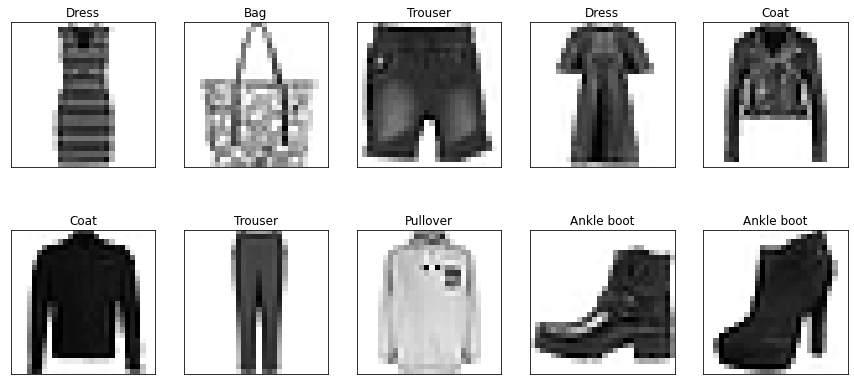

In [ ]:
import random

plt.figure(figsize=(15,7))

for i in range(10):
    ax=plt.subplot(2,5,1+i)
    indx= random.choice(range(len(train_data)))
    plt.xticks([])
    plt.yticks([])
    plt.title(label_class[train_label[indx]])
    plt.imshow(train_data[indx],cmap=plt.cm.binary)

## Building the model:


In [ ]:
## creating the Model:
model= tf.keras.Sequential([ 
                            tf.keras.layers.Flatten(input_shape=(28,28)),
                            tf.keras.layers.Dense(7,activation="relu"),
                            tf.keras.layers.Dense(7,activation="softmax"),
                            tf.keras.layers.Dense(10,activation="softmax")])


## Compile:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

lr_sch=tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4* 10**epoch/20)

non_normalise=model.fit(train_data,train_label,epochs=20,validation_data=(test_data,test_label), 
                                                                          callbacks=[lr_sch])

Epoch 1/20
1875/1875 [==============================] - 13s 6ms/step - loss: 2.3029 - accuracy: 0.1064 - val_loss: 2.2772 - val_accuracy: 0.1095 - lr: 5.0000e-06
Epoch 2/20
1875/1875 [==============================] - 11s 6ms/step - loss: 2.1567 - accuracy: 0.2348 - val_loss: 2.0894 - val_accuracy: 0.2823 - lr: 5.0000e-05
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.8362 - accuracy: 0.3379 - val_loss: 1.6407 - val_accuracy: 0.3994 - lr: 5.0000e-04
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.9261 - accuracy: 0.2138 - val_loss: 1.7603 - val_accuracy: 0.1987 - lr: 0.0050
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3084 - accuracy: 0.1028 - val_loss: 2.3240 - val_accuracy: 0.1000 - lr: 0.0500
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 2.4237 - accuracy: 0.1013 - val_loss: 2.3948 - val_accuracy: 0.1000 - lr: 0.5000
Epoch 7/20
1875/1875 [======================

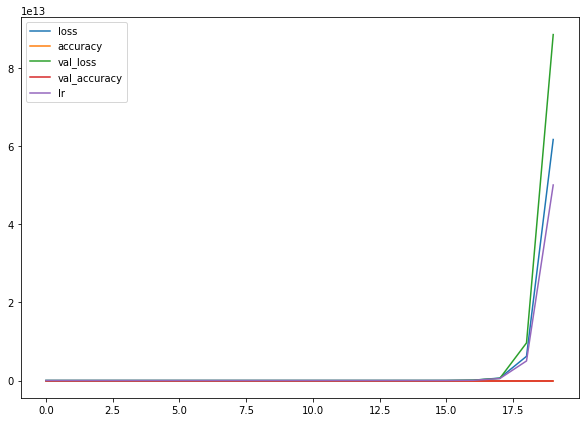

In [ ]:
pd.DataFrame(non_normalise.history).plot(figsize=(10,7))

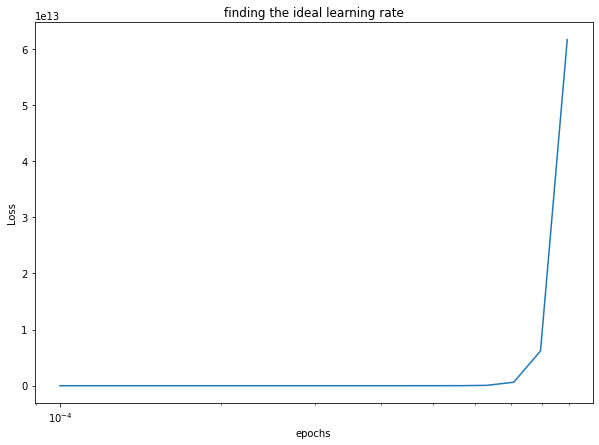

In [ ]:
plt.figure(figsize=(10,7))
lrs=(1e-4*(10**(tf.range(20)/20)))
plt.semilogx(lrs,non_normalise.history["loss"])
plt.xlabel("epochs")
plt.title("finding the ideal learning rate")
plt.ylabel("Loss");


In [ ]:

## building another mmodel:
model_1= tf.keras.Sequential([ 
                            tf.keras.layers.Flatten(input_shape=(28,28)),
                            tf.keras.layers.Dense(7,activation="relu"),
                            tf.keras.layers.Dense(7,activation="relu"),
                            tf.keras.layers.Dense(7,activation="softmax"),
                            tf.keras.layers.Dense(10,activation="softmax")])

model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])
lr_sch=tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-4*10**epoch/20)
   
non_normalise_1= model_1.fit(train_data,train_label,epochs=20,validation_data=(test_data,test_label),callbacks=[lr_sch])


Epoch 1/20
1875/1875 [==============================] - 8s 4ms/step - loss: 2.2978 - accuracy: 0.1730 - val_loss: 2.2856 - val_accuracy: 0.1869 - lr: 5.0000e-06
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 2.2138 - accuracy: 0.2510 - val_loss: 2.1594 - val_accuracy: 0.2812 - lr: 5.0000e-05
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.8423 - accuracy: 0.3158 - val_loss: 1.6614 - val_accuracy: 0.3240 - lr: 5.0000e-04
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 2.0495 - accuracy: 0.1904 - val_loss: 1.5066 - val_accuracy: 0.3585 - lr: 0.0050
Epoch 5/20
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3187 - accuracy: 0.1004 - val_loss: 2.3121 - val_accuracy: 0.1000 - lr: 0.0500
Epoch 6/20
1875/1875 [==============================] - 12s 6ms/step - loss: 2.4255 - accuracy: 0.0987 - val_loss: 2.3684 - val_accuracy: 0.1000 - lr: 0.5000
Epoch 7/20
1875/1875 [=======================

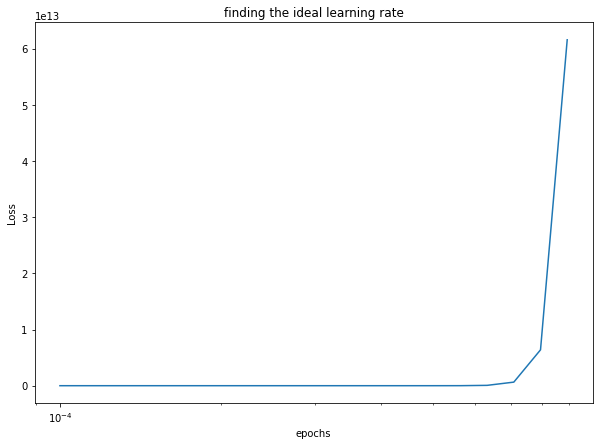

In [ ]:
plt.figure(figsize=(10,7))
lrs=(1e-4*(10**(tf.range(20)/20)))
plt.semilogx(lrs,non_normalise_1.history["loss"])
plt.xlabel("epochs")
plt.title("finding the ideal learning rate")
plt.ylabel("Loss");

In [ ]:
train_data.min(),train_data.max(),test_data.max(),test_data.min()

(0, 255, 255, 0)

In [ ]:
## normalizing the data to convert into zeros and one:

train_data_nor= train_data/225
test_data_nor=test_data/255

train_data_nor[0],test_data_nor[0]

(array([[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.

In [ ]:
## craeting the another model with the normalize data conversion:

model_2= tf.keras.Sequential([ 
                              tf.keras.layers.Flatten(input_shape=(28,28)),
                              tf.keras.layers.Dense(7,activation="relu"),
                              tf.keras.layers.Dense(7,activation="relu"),
                              tf.keras.layers.Dense(10,activation="softmax")])

model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                metrics=["accuracy"],
             optimizer=tf.keras.optimizers.Adam())

model_2.fit(train_data_nor,train_label,epochs=25,validation_data=(test_data,test_label))

Epoch 1/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.8063 - accuracy: 0.7221 - val_loss: 75.5582 - val_accuracy: 0.7717
Epoch 2/25
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5242 - accuracy: 0.8160 - val_loss: 79.6776 - val_accuracy: 0.7825
Epoch 3/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4791 - accuracy: 0.8330 - val_loss: 81.1731 - val_accuracy: 0.7814
Epoch 4/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4586 - accuracy: 0.8363 - val_loss: 82.2022 - val_accuracy: 0.7831
Epoch 5/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4439 - accuracy: 0.8426 - val_loss: 86.1258 - val_accuracy: 0.7895
Epoch 6/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4346 - accuracy: 0.8461 - val_loss: 83.1297 - val_accuracy: 0.7829
Epoch 7/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4275 - accuracy: 0.8478 - val_loss: 82.1792 - val_ac

In [ ]:
model_3= tf.keras.Sequential([ 
                              tf.keras.layers.Flatten(input_shape=(28,28)),
                              tf.keras.layers.Dense(7,activation="relu"),
                              tf.keras.layers.Dense(7,activation="relu"),
                              tf.keras.layers.Dense(10,activation="softmax")])

model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                metrics=["accuracy"],
             optimizer=tf.keras.optimizers.Adam(learning_rate=0.01))


normal_history = model_3.fit(train_data_nor,train_label,epochs=25,validation_data=(test_data,test_label))

Epoch 1/25
1875/1875 [==============================] - 6s 3ms/step - loss: 1.4936 - accuracy: 0.3240 - val_loss: 243.6936 - val_accuracy: 0.2002
Epoch 2/25
1875/1875 [==============================] - 6s 3ms/step - loss: 1.4048 - accuracy: 0.3516 - val_loss: 319.0332 - val_accuracy: 0.1998
Epoch 3/25
1875/1875 [==============================] - 6s 3ms/step - loss: 1.3990 - accuracy: 0.3474 - val_loss: 519.6334 - val_accuracy: 0.1994
Epoch 4/25
1875/1875 [==============================] - 6s 3ms/step - loss: 1.3791 - accuracy: 0.3583 - val_loss: 459.5337 - val_accuracy: 0.1998
Epoch 5/25
1875/1875 [==============================] - 6s 3ms/step - loss: 1.3613 - accuracy: 0.3684 - val_loss: 388.3444 - val_accuracy: 0.1998
Epoch 6/25
1875/1875 [==============================] - 6s 3ms/step - loss: 1.3418 - accuracy: 0.3810 - val_loss: 504.2310 - val_accuracy: 0.2004
Epoch 7/25
1875/1875 [==============================] - 6s 3ms/step - loss: 1.2619 - accuracy: 0.4327 - val_loss: 584.5638 -

In [ ]:

model_4= tf.keras.Sequential([ 
                              tf.keras.layers.Flatten(input_shape=(28,28)),
                              tf.keras.layers.Dense(7,activation="relu"),
                              tf.keras.layers.Dense(7,activation="relu"),
                              
                              tf.keras.layers.Dense(7,activation="relu"),
                              tf.keras.layers.Dense(10,activation="softmax")])

model_4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                metrics=["accuracy"],
             optimizer=tf.keras.optimizers.Adam(learning_rate=0.002))

model_4.fit(train_data_nor,train_label,epochs=30,validation_data=(test_data _nor,test_label)) ##error test_data_nor

In [ ]:
model_4= tf.keras.Sequential([ 
                              tf.keras.layers.Flatten(input_shape=(28,28)),
                              tf.keras.layers.Dense(7,activation="relu"),
                              tf.keras.layers.Dense(7,activation="relu"),
                              tf.keras.layers.Dense(7,activation="relu"),
                              tf.keras.layers.Dense(10,activation="softmax")])

model_4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                metrics=["accuracy"],
             optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))

normal_1=model_4.fit(train_data_nor,train_label,epochs=30,validation_data=(test_data_nor,test_label))

Epoch 1/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.9668 - accuracy: 0.6428 - val_loss: 0.6983 - val_accuracy: 0.7552
Epoch 2/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6230 - accuracy: 0.7821 - val_loss: 0.5938 - val_accuracy: 0.7960
Epoch 3/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5383 - accuracy: 0.8148 - val_loss: 0.5514 - val_accuracy: 0.8131
Epoch 4/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5057 - accuracy: 0.8269 - val_loss: 0.5188 - val_accuracy: 0.8244
Epoch 5/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4856 - accuracy: 0.8320 - val_loss: 0.5162 - val_accuracy: 0.8232
Epoch 6/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4717 - accuracy: 0.8381 - val_loss: 0.5113 - val_accuracy: 0.8260
Epoch 7/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4627 - accuracy: 0.8413 - val_loss: 0.4916 - val_accuracy:

In [ ]:
model_5= tf.keras.Sequential([ 
                              tf.keras.layers.Flatten(input_shape=(28,28)),
                              tf.keras.layers.Dense(7,activation="relu"),
                              tf.keras.layers.Dense(7,activation="relu"),
                              tf.keras.layers.Dense(7,activation="relu"),
                              tf.keras.layers.Dense(10,activation="softmax")])

model_5.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                metrics=["accuracy"],
             optimizer=tf.keras.optimizers.Adam())


lr_sch_5=tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-4*10**epoch/20)
   
normalise_5= model_1.fit(train_data_nor,train_label,epochs=30,validation_data=(test_data_nor,test_label),callbacks=[lr_sch_5])




Epoch 1/30
1875/1875 [==============================] - 8s 4ms/step - loss: 71235564208128.0000 - accuracy: 0.1000 - val_loss: 71235589373952.0000 - val_accuracy: 0.1000 - lr: 5.0000e-06
Epoch 2/30
1875/1875 [==============================] - 8s 4ms/step - loss: 71235606151168.0000 - accuracy: 0.1000 - val_loss: 71235589373952.0000 - val_accuracy: 0.1000 - lr: 5.0000e-05
Epoch 3/30
1875/1875 [==============================] - 8s 4ms/step - loss: 71235572596736.0000 - accuracy: 0.1000 - val_loss: 71235589373952.0000 - val_accuracy: 0.1000 - lr: 5.0000e-04
Epoch 4/30
1875/1875 [==============================] - 8s 4ms/step - loss: 71235513876480.0000 - accuracy: 0.1000 - val_loss: 71235589373952.0000 - val_accuracy: 0.1000 - lr: 0.0050
Epoch 5/30
1875/1875 [==============================] - 8s 4ms/step - loss: 71235555819520.0000 - accuracy: 0.1000 - val_loss: 71235589373952.0000 - val_accuracy: 0.1000 - lr: 0.0500
Epoch 6/30
1875/1875 [==============================] - 8s 4ms/step - los

```
model 4 is performing well among all
```

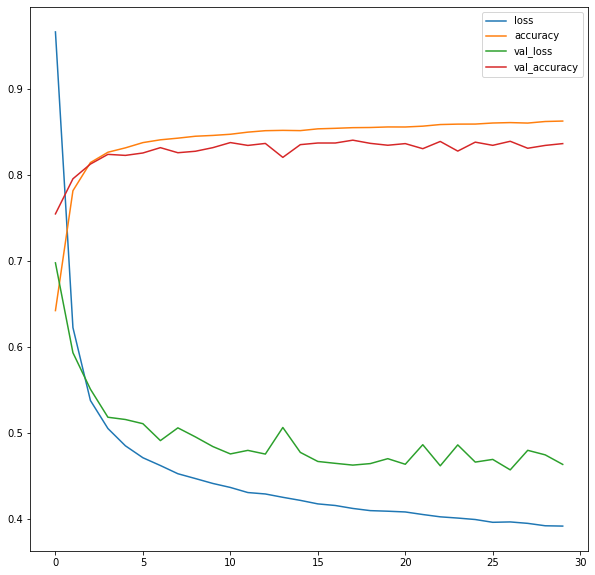

In [ ]:
pd.DataFrame(normal_1.history).plot(figsize=(10,10));

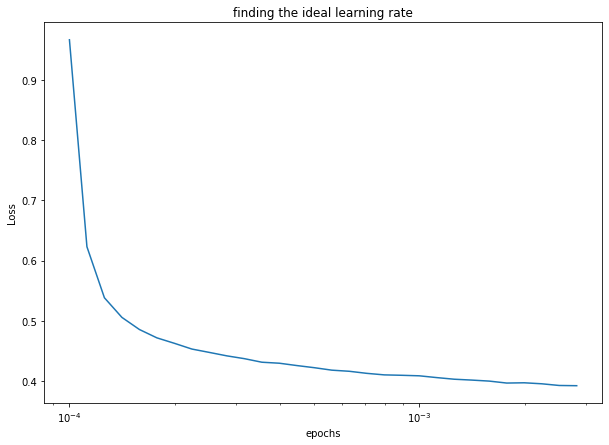

In [ ]:
plt.figure(figsize=(10,7))
lrs=(1e-4*(10**(tf.range(30)/20)))
plt.semilogx(lrs,normal_1.history["loss"])
plt.xlabel("epochs")
plt.title("finding the ideal learning rate")
plt.ylabel("Loss");

In [ ]:
## Predicting the data:
y_probs= model_4.predict(test_data_nor)
y_probs[0]

## checking the prediction:
print(f'predicted label:{label_class[tf.argmax(y_probs[0])] }')
print(f'test_label:{label_class[test_label[0]]}')



predicted label:Ankle boot
test_label:Ankle boot


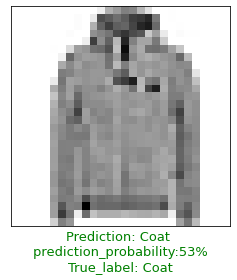

In [ ]:
# setting data into variables:
import random
i=random.choice(range(len(test_data)))
pred_label=label_class[tf.argmax(y_probs[i])]
image= test_data_nor[i]
true_label=label_class[test_label[i]]
pred_prob = model_4.predict(image.reshape(1,28,28))
## Plotting the data:

if pred_label==true_label:
    color='green'
else:
    color='red'
plt.xticks([])
plt.yticks([])
## adding information (prediction /true label)
plt.xlabel("Prediction: {} \n prediction_probability:{:2.0f}% \nTrue_label: {}".format(pred_label,
                                                    100*tf.reduce_max(pred_prob),
                                                    true_label),
                color=color,size=13) # set the color to green or red
plt.tight_layout()
plt.imshow(image,cmap=plt.cm.binary);




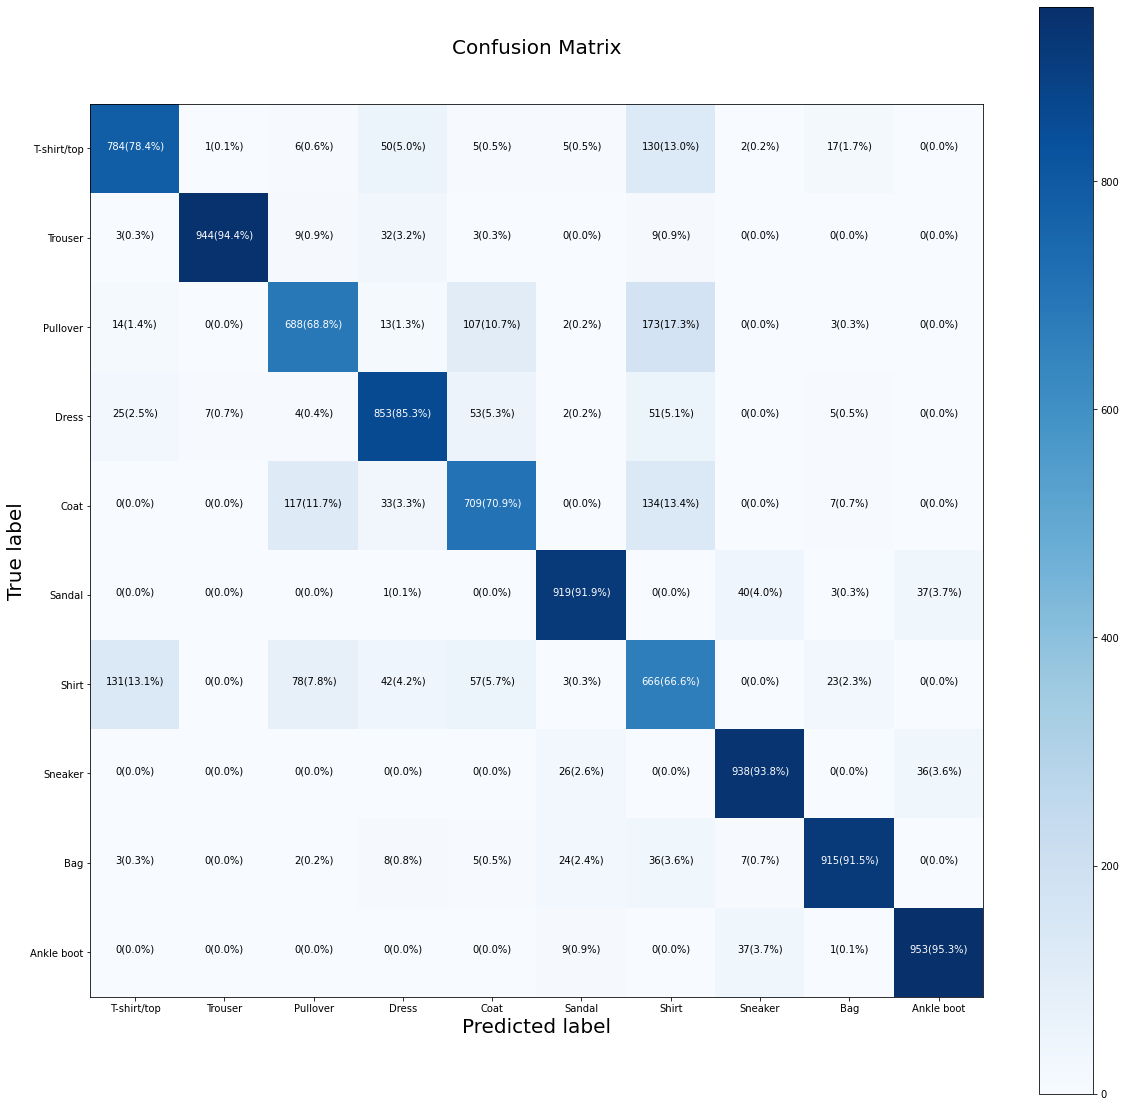

In [ ]:
# Convert all of the predictions from probabilities to labels
y_preds =y_probs.argmax(axis=1)


# Check out the non-prettified confusion matrix
from sklearn.metrics import confusion_matrix
import itertools
cm=confusion_matrix(test_label,y_preds)
cm_normal = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it




## plot and labels  :
fig, ax = plt.subplots(figsize=(20,20))
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues) 
fig.colorbar(cax)

# Create classes
classes = label_class
n_classes=cm.shape[0]
if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)
# plot text :
threshold= (cm.max()+cm.min())/2.
for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,f'{cm[i,j]}({cm_normal[i,j]*100:.1f}%)',horizontalalignment="center",color="white" if cm[i, j] > threshold else "black", size=10)
    
    





In [ ]:
# Can now calculate the number of paramters in our model
model_4.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 7)                 5495      
                                                                 
 dense_5 (Dense)             (None, 7)                 56        
                                                                 
 dense_6 (Dense)             (None, 7)                 56        
                                                                 
 dense_7 (Dense)             (None, 10)                80        
                                                                 
Total params: 5,687
Trainable params: 5,687
Non-trainable params: 0
_________________________________________________________________


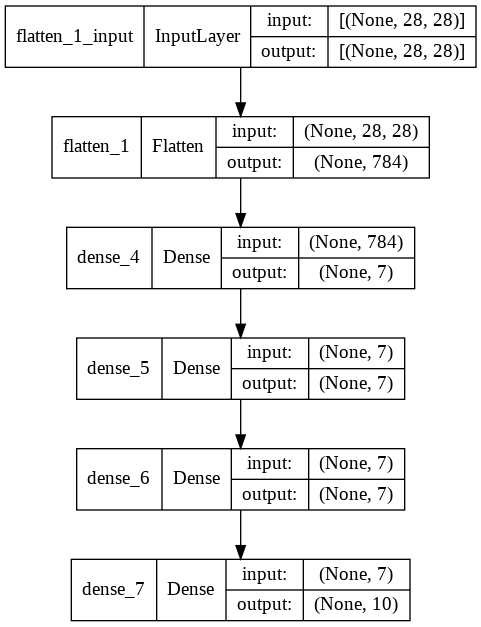

In [ ]:
from tensorflow.keras.utils import plot_model

# See the inputs and outputs of each layer
plot_model(model_4, show_shapes=True)